In [1]:
from keras.layers import Input,Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model 
from keras.datasets import mnist 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [5]:
noise_rate =0.5
noisy_x_train = x_train +noise_rate*np.random.normal(loc=0.0, scale=1.0,
                                                    size=x_train.shape)
noisy_x_test = x_test +noise_rate*np.random.normal(loc=0.0, scale=1.0,
                                                    size=x_test.shape)
noisy_x_train=np.clip(noisy_x_train, 0.,1.)
noisy_x_test=np.clip(noisy_x_test, 0.,1.)

In [3]:
input_imgs = Input(shape=(28,28,1)) # 영상크기 28*28 
img = Conv2D(16,(3,3), activation='relu',padding='same')(input_imgs) 
img = MaxPooling2D((2,2), padding='same')(img) #영상크기  14*14
img = Conv2D(8,(3,3), activation='relu',padding='same')(img)
img = MaxPooling2D((2,2), padding='same')(img) #영상크기 7*7
img = Conv2D(8,(3,3), activation='relu',padding='same')(img)

encoder_img = MaxPooling2D((2,2), padding='same')(img) #영상크기 4*4

img = Conv2D(8,(3,3), activation='relu',padding='same')(encoder_img)
img = UpSampling2D((2,2))(img) #영상크기 7*7
img = Conv2D(8,(3,3), activation='relu',padding='same')(img)
img = UpSampling2D((2,2))(img) #영상크기 14*14
img = Conv2D(16,(3,3), activation='relu')(img)
img = UpSampling2D((2,2))(img) #영상크기 28*28
decoder_img = Conv2D(1,(3,3), activation ='sigmoid', padding ='same')(img)

encoder = Model(input_imgs, encoder_img)
autoencoder = Model(input_imgs, decoder_img)

In [4]:
autoencoder.compile(optimizer ='adadelta', loss ='binary_crossentropy',
                  metrics=['accuracy'])

In [6]:
n=50 
hist=autoencoder.fit(noisy_x_train, x_train, epochs = n, batch_size=256, shuffle =True,
                    validation_data=(noisy_x_test,x_test))
loss=hist.history['loss']
accuracy=hist.history['accuracy']
print('training Loss=',loss[n-1], 'training Accuracy=', accuracy[n-1])

Epoch 1/50
235/235 [==============================] - 28s 117ms/step - loss: 0.6930 - accuracy: 0.3546 - val_loss: 0.6921 - val_accuracy: 0.4464
Epoch 2/50
235/235 [==============================] - 27s 113ms/step - loss: 0.6917 - accuracy: 0.4844 - val_loss: 0.6905 - val_accuracy: 0.6031
Epoch 3/50
235/235 [==============================] - 26s 112ms/step - loss: 0.6900 - accuracy: 0.6429 - val_loss: 0.6882 - val_accuracy: 0.7363
Epoch 4/50
235/235 [==============================] - 26s 113ms/step - loss: 0.6874 - accuracy: 0.7539 - val_loss: 0.6850 - val_accuracy: 0.7781
Epoch 5/50
235/235 [==============================] - 27s 113ms/step - loss: 0.6839 - accuracy: 0.7819 - val_loss: 0.6807 - val_accuracy: 0.7844
Epoch 6/50
235/235 [==============================] - 27s 113ms/step - loss: 0.6792 - accuracy: 0.7870 - val_loss: 0.6746 - val_accuracy: 0.7870
Epoch 7/50
235/235 [==============================] - 27s 116ms/step - loss: 0.6723 - accuracy: 0.7894 - val_loss: 0.6648 - val_ac

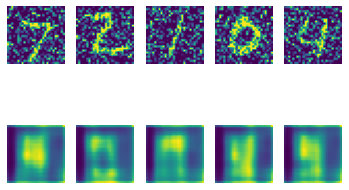

In [9]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

np=5  # 몇 개의 숫자를 나타낼 것인지
plt.figure(2)
for i in range(np):
    ax = plt.subplot(2, np, i + 1)
    plt.imshow(noisy_x_test[i].reshape(28, 28))
    plt.axis('off')

    ax = plt.subplot(2, np, i + 1 + np)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis('off')       
plt.show()